<a href="https://colab.research.google.com/github/MichelleRitaM/MichelleRitaM/blob/main/Kmodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas
data = pandas.read_csv("http://modcom.co.ke/datasets/bank.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
# Gender. Married, Education, Loan_ID
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
# Fill empties
data['Gender'].fillna('Unknown', inplace= True)
data['Married'].fillna('Unknown', inplace= True)

In [4]:
subset = data[['Gender','Married', 'Education', 'Loan_ID']]
subset

,Gender,Married,Education,Loan_ID
0,Male,No,Graduate,LP001002
1,Male,Yes,Graduate,LP001003
2,Male,Yes,Graduate,LP001005
3,Male,Yes,Not Graduate,LP001006
4,Male,No,Graduate,LP001008
...,...,...,...,...
609,Female,No,Graduate,LP002978
610,Male,Yes,Graduate,LP002979
611,Male,Yes,Graduate,LP002983
612,Male,Yes,Graduate,LP002984


In [5]:
# Get data in an array
array = subset.values
X = array[:,0:3]
# No response Y

In [6]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


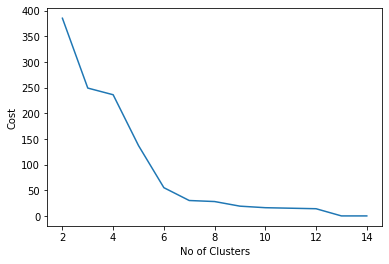

In [7]:
# Elbow method
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
cost = []
for i in range(2, 15):
    kmodes = KModes(n_clusters=i)
    kmodes.fit(X)
    cost.append(kmodes.cost_)

plt.plot(range(2, 15), cost)
plt.xlabel('No of Clusters')
plt.ylabel('Cost')
plt.show()

In [8]:
model = KModes(n_clusters=12, random_state=42)
model.fit(X)

modes = model.cluster_centroids_
clusters = pandas.DataFrame(modes, columns = ['Gender', 'Married', 'Education'])
clusters

,Gender,Married,Education
0,Male,Yes,Graduate
1,Male,No,Not Graduate
2,Female,No,Graduate
3,Female,Yes,Not Graduate
4,Male,No,Graduate
5,Male,Yes,Not Graduate
6,Female,Yes,Graduate
7,Male,Unknown,Graduate
8,Unknown,Yes,Graduate
9,Unknown,No,Graduate


In [9]:
# Lets see who is in group 1
subset['label'] = model.labels_
cluster1 = subset[subset['label'] == 1]
cluster1.to_csv('c1.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
